# Titanic дерево решений

In [24]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
import pydot
import subprocess

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

plt.style.use('ggplot')
%matplotlib inline

In [25]:
df=pd.read_csv("/Users/daniilvdovinov/Desktop/DATA-ANALYSYS_2/Dataset/titanic.csv",encoding="cp1251")
print(df.shape)
print(df.info())
df.head()

(887, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB
None


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [44]:
le = LabelEncoder()
le.fit(df.Sex)
df['Sex_bin'] = le.transform(df.Sex)
x=df[['Pclass', 'Sex_bin', 'Age', 'Fare']]
y=df.values[::, 0]

In [159]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [160]:
tree=DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf=5)
tree.fit(x_train, y_train)

print('Результат на обучающей выборке: ', tree.score(x_train,y_train))
print('Результат на тестовой выборке: ',tree.score(x_test, y_test))

Результат на обучающей выборке:  0.8548387096774194
Результат на тестовой выборке:  0.8539325842696629


In [119]:
export_graphviz(tree, out_file='/Users/daniilvdovinov/Desktop/DATA-ANALYSIS/Homework/Homework3/Titanic_tree.dot', 
               rounded = True, proportion = False, 
                precision = 2, filled = True,feature_names=x.columns)
(graph, ) = pydot.graph_from_dot_file('/Users/daniilvdovinov/Desktop/DATA-ANALYSIS/Homework/Homework3/Titanic_tree.dot')
graph.write_png('/Users/daniilvdovinov/Desktop/DATA-ANALYSIS/Homework/Homework3/Titanic_tree.png')

In [161]:
tree=DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5)
tree.fit(x_train, y_train)

print('Результат на обучающей выборке: ', tree.score(x_train,y_train))
print('Результат на тестовой выборке: ',tree.score(x_test, y_test))

Результат на обучающей выборке:  0.85
Результат на тестовой выборке:  0.8389513108614233


In [150]:
import sklearn.metrics as metrics

In [162]:
y_score = tree.predict(x_test)

print(metrics.accuracy_score(y_test, y_score))
print(metrics.recall_score(y_test, y_score))
print(metrics.precision_score(y_test, y_score))
print(metrics.f1_score(y_test, y_score))
print(metrics.balanced_accuracy_score(y_test, y_score))
print(metrics.matthews_corrcoef(y_test, y_score))
print(metrics.cohen_kappa_score(y_test, y_score))

0.8389513108614233
0.7653061224489796
0.7894736842105263
0.7772020725388602
0.8234814635913537
0.6513430134895961
0.6511500714046975


[[0.83333333 0.16666667]
 [0.96078431 0.03921569]
 [1.         0.        ]
 [0.33333333 0.66666667]
 [1.         0.        ]
 [0.9        0.1       ]
 [0.59090909 0.40909091]
 [0.85714286 0.14285714]
 [0.92682927 0.07317073]
 [0.         1.        ]
 [0.92682927 0.07317073]
 [0.25       0.75      ]
 [0.83333333 0.16666667]
 [0.85714286 0.14285714]
 [0.85714286 0.14285714]
 [0.         1.        ]
 [0.25       0.75      ]
 [0.96078431 0.03921569]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.54       0.46      ]
 [1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.92682927 0.07317073]
 [1.         0.        ]
 [0.54       0.46      ]
 [0.54       0.46      ]
 [0.9        0.1       ]
 [0.         1.        ]
 [1.         0.        ]
 [0.92682927 0.07317073]
 [0.         1.        ]
 [0.96078431 0.03921569]
 [0.92682927 0.07317073]
 [0.         1.        ]
 [0.         1.        ]
 [0.96078431 0.03921569]
 [0.4        0.6       ]


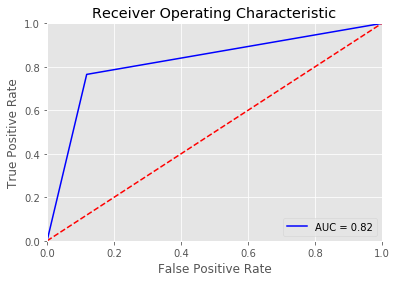

In [165]:
probs = tree.predict_proba(x_test)
print(probs)
preds = probs[:,1]
print(preds)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()